In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

csv = pd.read_csv("../../../data/train_data/Simon_test_3.csv")
df = pd.DataFrame(csv)
df_time_offset = df["Timestamp"][0]
df["Timestamp"] = df["Timestamp"] - df_time_offset
df

Timestamp       a_x       a_y       a_z       g_x       g_y       g_z  \
0        0.000000 -0.004732 -0.690689 -0.726169  0.534539  0.058521 -0.165964   
1        0.009995 -0.002709 -0.698488 -0.724475  0.409979  0.054647  0.095046   
2        0.019997 -0.003355 -0.695562 -0.726584  0.197535 -0.101003  0.048017   
3        0.029999 -0.002963 -0.695249 -0.725356  0.109812 -0.219404 -0.035955   
4        0.039993 -0.002754 -0.695206 -0.724380  0.217217 -0.303979 -0.087488   
...           ...       ...       ...       ...       ...       ...       ...   
59996  599.960007 -0.153711 -0.962468 -0.193948 -0.202359  1.699549 -0.681699   
59997  599.969955 -0.149983 -0.962639 -0.190256  0.686184  2.019532 -0.731934   
59998  599.979965 -0.143293 -0.970871 -0.190805  1.290162  1.770548 -0.626909   
59999  599.989975 -0.138863 -0.984151 -0.188710  1.167098  0.943729 -0.554751   
60000  599.999985 -0.136356 -0.997080 -0.185212  0.208909  0.223167 -0.547338   

       w_x  w_y  w_z        r_x       r_y         r_z       q_w       q_x  \
0      0.0  0.0  0.0  47.377846 -0.609170  -45.406113  0.845599 -0.368757   
1      0.0  0.0  0.0  47.381931 -0.609500  -45.405064  0.845589 -0.368787   
2      0.0  0.0  0.0  47.383907 -0.610535  -45.405483  0.845583 -0.368798   
3      0.0  0.0  0.0  47.385029 -0.611754  -45.407349  0.845575 -0.368800   
4      0.0  0.0  0.0  47.127167 -0.566297  -45.254425  0.846813 -0.367248   
...    ...  ...  ...        ...       ...         ...       ...       ...   
59996  0.0  0.0  0.0  78.837799 -8.630409 -102.535255  0.519256 -0.350830   
59997  0.0  0.0  0.0  78.841873 -8.619314 -102.516655  0.519292 -0.350995   
59998  0.0  0.0  0.0  78.852333 -8.609745 -102.500313  0.519303 -0.351171   
59999  0.0  0.0  0.0  78.877586 -8.571616 -102.526077  0.518945 -0.351376   
60000  0.0  0.0  0.0  78.879501 -8.565804 -102.524933  0.518922 -0.351422   

            q_y       q_z  
0      0.159554  0.351459  
1      0.159566  0.351445  
2      0.159581  0.351442  
3      0.159599  0.351450  
4      0.157983  0.350826  
...         ...       ...  
59996  0.530303  0.571026  
59997  0.530223  0.570965  
59998  0.530188  0.570880  
59999  0.530245  0.571027  
60000  0.530228  0.571035  

[60001 rows x 17 columns]

In [17]:
POSE_MAP= {
    "rett": 0,
    "framover": 1,
    "bakover": 2,
    "venstre": 3,
    "hoyre": 4,
}

def get_timestamp_and_pose(filename):
    rows = []
    with open(filename, "r") as f:
        lines = f.readlines()
        offset = float(lines[1].strip().split(";")[1]) # This offset is the duration spent in the video before recording of data begun.
        for l in lines[1:]:
            sep_row = l.strip().split(";")
            finished_row = [round(float(x)-offset,2) for x in sep_row[1:3]]
            finished_row.append(POSE_MAP[sep_row[3].lower()])
            rows.append(finished_row)
    return rows

f_name = "../../../data/train_data/simon_train_3.txt"
stamped_poses = get_timestamp_and_pose(f_name)
print(stamped_poses)

df_stamped_poses = []
pose_index = 0
row_index = 0
for stamp in df["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[pose_index][1]:
            pose_index += 1
        pose_id = stamped_poses[pose_index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp >= stamped_poses[pose_index][0]:
            df_stamped_poses.append(pose_id)
        else:
            df = df.drop(row_index)
    row_index += 1

    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    #df_stamped_poses.append(pose_id)

#print(df_stamped_poses)

df["Pose"] = df_stamped_poses
#print(df[2400:2500][:])
print(len(df.index))






[[0.0, 122.48, 0], [123.28, 240.4, 1], [358.28, 360.2, 3], [362.4, 482.12, 4], [484.4, 602.84, 2]]
47686


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

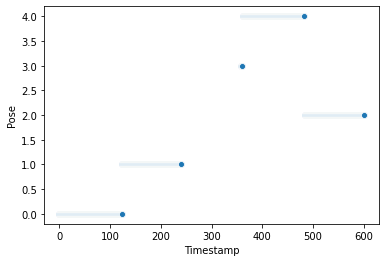

In [22]:
#df['Pose'].hist(bins=4)
sns.lineplot(data=df, x="Timestamp", y='Pose',linestyle="",marker="o")

In [25]:
df[df['Pose'] == 3]

Timestamp       a_x       a_y       a_z        g_x        g_y  \
12329  123.289993 -0.169743 -0.491624 -0.818250 -21.432369 -15.380711   
12330  123.299988 -0.244882 -0.513724 -0.810301 -21.207695 -13.406301   
12331  123.309998 -0.248102 -0.441395 -0.860005 -17.457983  -6.724826   
12332  123.319992 -0.148328 -0.398430 -0.851908 -23.218756  -9.836635   
12333  123.329987 -0.184101 -0.414246 -0.911222 -24.850681  -5.710690   
...           ...       ...       ...       ...        ...        ...   
24036  240.360001 -0.126298 -0.285396 -0.946436   0.568589  -2.305716   
24037  240.369980 -0.124895 -0.286859 -0.948543   0.944005  -2.116586   
24038  240.379990 -0.123247 -0.288313 -0.951166   0.874741  -2.142755   
24039  240.389999 -0.121856 -0.291252 -0.952190   0.610376  -2.291287   
24040  240.399979 -0.119857 -0.291807 -0.950494   0.593726  -2.391946   

             g_z  w_x  w_y  w_z        r_x        r_y        r_z       q_w  \
12329   3.303156  0.0  0.0  0.0  30.819254 -11.967191 -55.224277  0.862435   
12330   1.700490  0.0  0.0  0.0  30.618658 -12.091113 -55.279369  0.862595   
12331   5.363180  0.0  0.0  0.0  30.441486 -12.176271 -55.267052  0.862948   
12332   9.717055  0.0  0.0  0.0  30.201866 -12.310206 -55.232067  0.863493   
12333  10.076303  0.0  0.0  0.0  29.940529 -12.410137 -55.172089  0.864148   
...          ...  ...  ...  ...        ...        ...        ...       ...   
24036   0.711122  0.0  0.0  0.0  16.493217  -7.291702 -73.612488  0.796248   
24037   0.458657  0.0  0.0  0.0  16.502865  -7.313299 -73.614128  0.796240   
24038   0.285015  0.0  0.0  0.0  16.512043  -7.334650 -73.617516  0.796223   
24039   0.098409  0.0  0.0  0.0  16.530123  -7.347682 -73.621849  0.796193   
24040   0.013392  0.0  0.0  0.0  16.536924  -7.370648 -73.628586  0.796161   

            q_x       q_y       q_z  Pose  
12329 -0.187593  0.211535  0.419843     1  
12330 -0.185474  0.211795  0.420325     1  
12331 -0.183814  0.211747  0.420352     1  
12332 -0.181524  0.211791  0.420206     1  
12333 -0.179256  0.211469  0.419996     1  
...         ...       ...       ...   ...  
24036 -0.076907  0.136146  0.584413     1  
24037 -0.076860  0.136345  0.584384     1  
24038 -0.076808  0.136540  0.584369     1  
24039 -0.076860  0.136724  0.584360     1  
24040 -0.076779  0.136921  0.584368     1  

[11712 rows x 18 columns]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df
y = df["Pose"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[3699    0    0    0    0]
 [   0 3446    0    0    0]
 [   0    0 3505    0    0]
 [   0    0    0   60    0]
 [   0    0    0    0 3596]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3699
           1       1.00      1.00      1.00      3446
           2       1.00      1.00      1.00      3505
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00      3596

    accuracy                           1.00     14306
   macro avg       1.00      1.00      1.00     14306
weighted avg       1.00      1.00      1.00     14306

